In [1]:
library(ggvenn)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

Loading required package: ggplot2



In [2]:
Sys.setenv(psi_fig_tables_RData_dir="/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2022/psi_calculation/results/genomewide_PSI/psi_quanti/fig_tables/RData")
setwd(Sys.getenv("psi_fig_tables_RData_dir"))
ANALYZE_ORIGINAL_DATA=TRUE
original.skeletal_cardiac_stat_by_exon_cleaned <- 
read.table(paste0(Sys.getenv("psi_fig_tables_RData_dir"), "/ori_data.", ANALYZE_ORIGINAL_DATA, ".skeletal_cardiac_stat_by_exon_cleaned.tsv"), 
            sep = "\t", header=T)
original.stat_by_gene <- 
read.table(paste0(Sys.getenv("psi_fig_tables_RData_dir"), "/ori_data.", ANALYZE_ORIGINAL_DATA, ".stat_by_gene.tsv"), 
            sep = "\t", header=T)

In [3]:
Sys.setenv(psi_fig_tables_RData_dir="/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2022/psi_calculation/results/genomewide_PSI/psi_quanti/fig_tables/RData")
ANALYZE_ORIGINAL_DATA=FALSE
adjusted.skeletal_cardiac_stat_by_exon_cleaned <- 
read.table(paste0(Sys.getenv("psi_fig_tables_RData_dir"), "/ori_data.", ANALYZE_ORIGINAL_DATA, ".skeletal_cardiac_stat_by_exon_cleaned.tsv"), 
            sep = "\t", header=T)
adjusted.stat_by_gene <- 
read.table(paste0(Sys.getenv("psi_fig_tables_RData_dir"), "/ori_data.", ANALYZE_ORIGINAL_DATA, ".stat_by_gene.tsv"), 
            sep = "\t", header=T)

In [ ]:
original.skeletal_cardiac_stat_by_exon_cleaned$gene_exon <- paste(original.skeletal_cardiac_stat_by_exon_cleaned$gene, original.skeletal_cardiac_stat_by_exon_cleaned$exon_num, sep=":")
adjusted.skeletal_cardiac_stat_by_exon_cleaned$gene_exon <- paste(adjusted.skeletal_cardiac_stat_by_exon_cleaned$gene, adjusted.skeletal_cardiac_stat_by_exon_cleaned$exon_num, sep=":")


In [ ]:
col_sz <- c('#00A1D5FF','#6A6599FF','#DF8F44FF','#B24745FF','#80796BFF','#79AF97FF','#374E55FF')
first_col_idx <- 1
base_width <- 3.5
base_font_size <- 7
size_rel1 <- 1.15
size_rel3 <- 1.2
subfigure_label_size <- 9
age_group_label <- "age group"
cohort_label <- "cohort"
source("/Users/suzheng/Documents/suzheng/UNSW/UNSWTasks/2021/velocityRNA/results/combined_analysis/visualize4paper/shared/shared.R")


theme_Publication <- function(base_size=base_font_size, base_family="Helvetica") {

      (theme_foundation(base_size=base_size, base_family=base_family)
       + theme(plot.title = element_text(face = "bold",
                                         size = rel(size_rel3), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               panel.border = element_rect(colour = NA),
               axis.title = element_text(size = rel(size_rel1)),  # Increased size for axis title
               axis.title.y = element_text(angle=90,vjust =2, size = rel(size_rel1)),  # Increased size for y-axis title
               axis.title.x = element_text(vjust = -0.2, size = rel(size_rel1)),  # Increased size for x-axis title
               axis.text = element_text(size = rel(size_rel3)),  # Increased size for axis text (labels)
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               panel.grid.major = element_blank(),
               panel.grid.minor = element_blank(),
               legend.key = element_rect(colour = NA),
               legend.position = "top",
               legend.direction = "horizontal",
               legend.key.size= unit(rel(size_rel1), "npc"),
               legend.margin = margin(t = 0, unit='cm'),
               legend.title = element_text(face="italic", size = rel(size_rel1)),
               plot.margin=unit(c(4,4,4,4),"mm"),
               strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
               strip.text = element_text(face="bold")
          ))
}

add_subfigure_label <- function(p, subfigure_label, subfigure_label_size=13){
    cowplot::ggdraw(p) + 
      cowplot::draw_label(label = subfigure_label, x = 0, y = 1, hjust = 0, vjust = 1, size = subfigure_label_size, fontface = "bold")
}

You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167



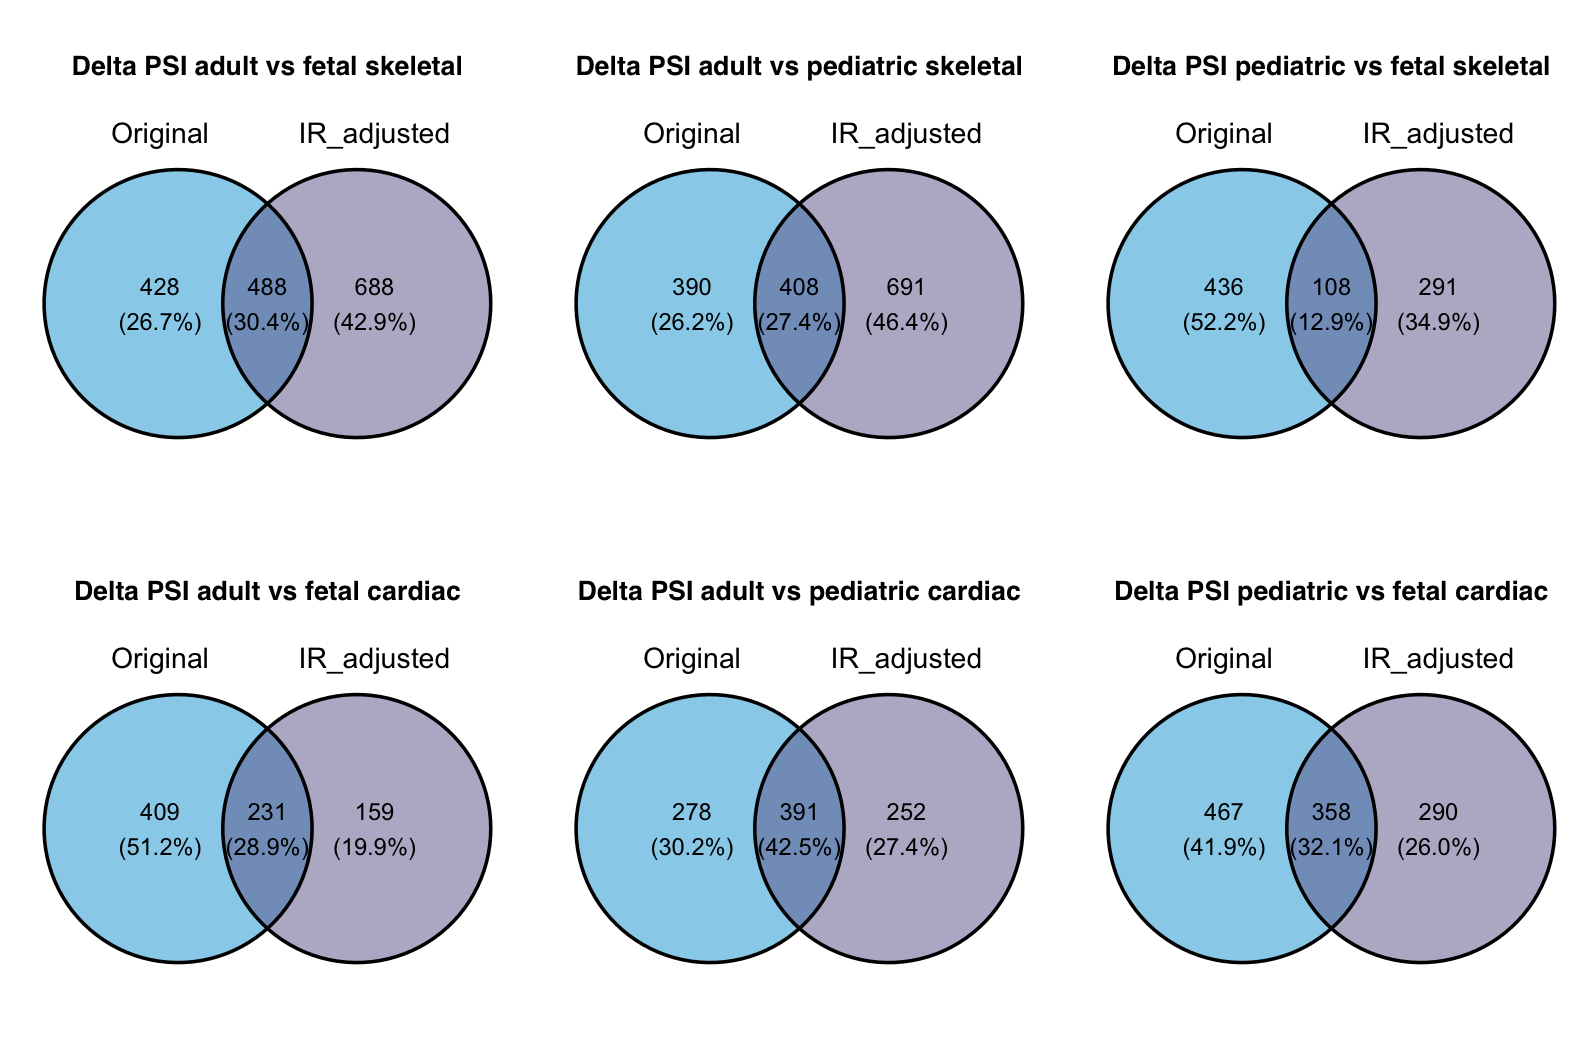

In [25]:


cutoff <- 0.2
plot_one_delta <- function(val_col, id_col="gene_exon"){
    cbind_df <- cbind(original.skeletal_cardiac_stat_by_exon_cleaned[, c(id_col, val_col)], adjusted.skeletal_cardiac_stat_by_exon_cleaned[,val_col])
    valid_rows <- !is.na(cbind_df[,2]) & !is.na(cbind_df[,3])& cbind_df[,2] * cbind_df[,3] >= 0
    df1 <- original.skeletal_cardiac_stat_by_exon_cleaned[valid_rows, ]
    ori.fil_ids <- df1[df1[[val_col]] > cutoff | df1[[val_col]] < -1* cutoff, id_col]
    df2 <- adjusted.skeletal_cardiac_stat_by_exon_cleaned[valid_rows, ]
    adj.fil_ids <- df2[df2[[val_col]] > cutoff | df2[[val_col]] < -1* cutoff, id_col]
    
    # Compute the intersection of the filtered IDs
    fil_ids_union <- intersect(ori.fil_ids, adj.fil_ids)
    
    # Select the rows based on union of IDs
    selected_rows1 <- df1[[id_col]] %in% fil_ids_union
    selected_rows2 <- df2[[id_col]] %in% fil_ids_union
    
    # Check if the selected rows are identical (assuming you want to confirm this)
    stopifnot(all(selected_rows1 == selected_rows2))
    
    # Combine the selected rows into a new data frame
    df_to_output <- cbind(df1[selected_rows1, c("gene", "exon_num", val_col)], df2[selected_rows2, val_col])
    colnames(df_to_output) <- c("gene", "exon_num", paste0(val_col, ".original"), paste0(val_col, ".IR_adjusted"))
    write.table(df_to_output, file=paste0(Sys.getenv("psi_fig_tables_RData_dir"), "/delta_PSI_by_exon.", val_col, ".tsv"), row.names = FALSE, quote = FALSE, sep = "\t")
    
    data <- list(Original = ori.fil_ids, IR_adjusted = adj.fil_ids)
    title_lab <- gsub("_|\\.", " ", gsub("delta", "Delta PSI", val_col))
    plot <- ggvenn(data, fill_color=col_sz[1:2], text_size=5) +
              labs(title = title_lab) + 
              theme_Publication() + 
              theme(plot.title = element_text(size = 16, margin = margin(b = 20)),
                   axis.text = element_blank(),
                axis.ticks = element_blank(),
                axis.title = element_blank(),
                     axis.line = element_blank())+
              ylim(-1.1, 1.3) +
          xlab(NULL) + 
          ylab(NULL)
    
    return(plot)
}
p1 <- plot_one_delta("delta_adult_vs_fetal.skeletal")
p2 <- plot_one_delta("delta_adult_vs_pediatric.skeletal")
p3 <- plot_one_delta("delta_pediatric_vs_fetal.skeletal")
p4 <- plot_one_delta("delta_adult_vs_fetal.cardiac")
p5 <- plot_one_delta("delta_adult_vs_pediatric.cardiac")
p6 <- plot_one_delta("delta_pediatric_vs_fetal.cardiac")


ww <- base_width*3.8
hh <- base_width*2.5
options(repr.plot.width=ww, repr.plot.height=hh)


layout_mat <- matrix(1:6, ncol = 3, byrow=T)
# p1 = add_subfigure_label(p1, "a")
# p2 = add_subfigure_label(p2, "b")
# p3 = add_subfigure_label(p3, "c")
# p4 = add_subfigure_label(p4, "d")
# p5 = add_subfigure_label(p5, "e")
# p6 = add_subfigure_label(p6, "f")

ge <- gridExtra::grid.arrange(p1, p2, p3, p4, p5, p6, ncol = 3, layout_matrix = layout_mat)
ggsave("FigureS5.pdf", ge, width = ww, height = hh)


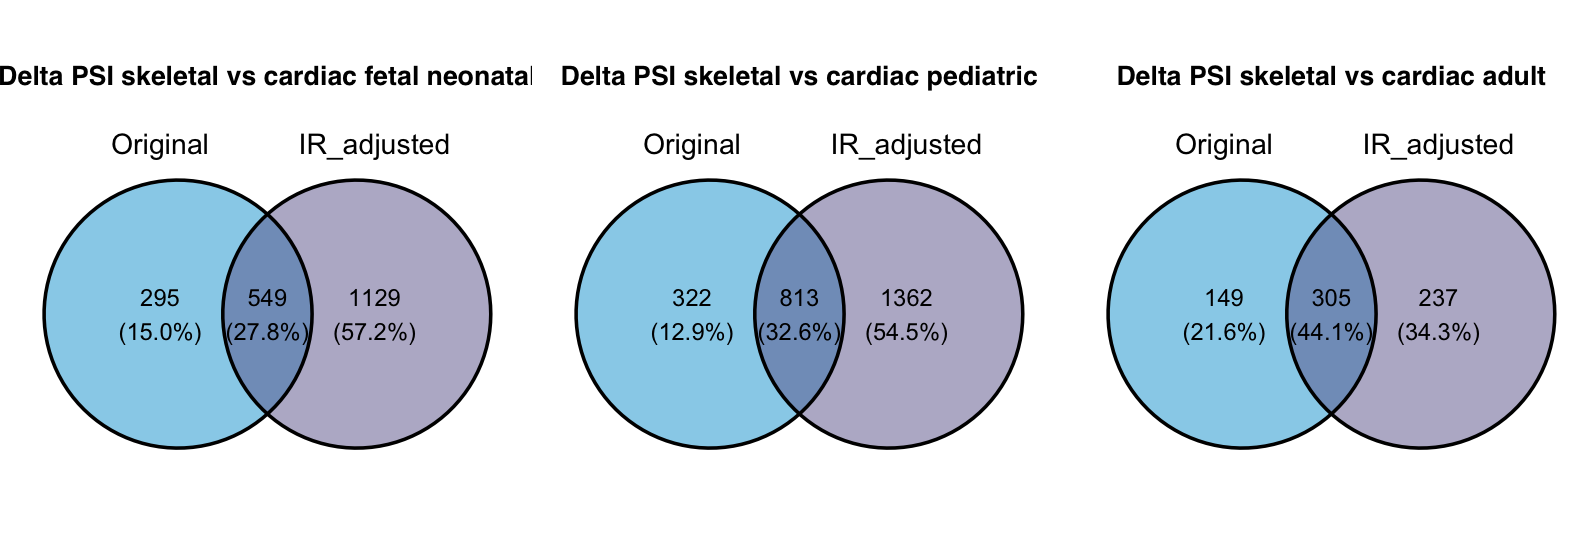

In [26]:
p1 <- plot_one_delta('delta_skeletal_vs_cardiac.fetal_neonatal')
p2 <- plot_one_delta('delta_skeletal_vs_cardiac.pediatric')
p3 <- plot_one_delta('delta_skeletal_vs_cardiac.adult')
ww <- base_width*3.8
hh <- base_width*1.3
options(repr.plot.width=ww, repr.plot.height=hh)


layout_mat <- matrix(1:3, ncol = 3, byrow=T)

ge <- gridExtra::grid.arrange(p1, p2, p3, ncol = 3, layout_matrix = layout_mat)
ggsave("FigureS6.pdf", ge, width = ww, height = hh)

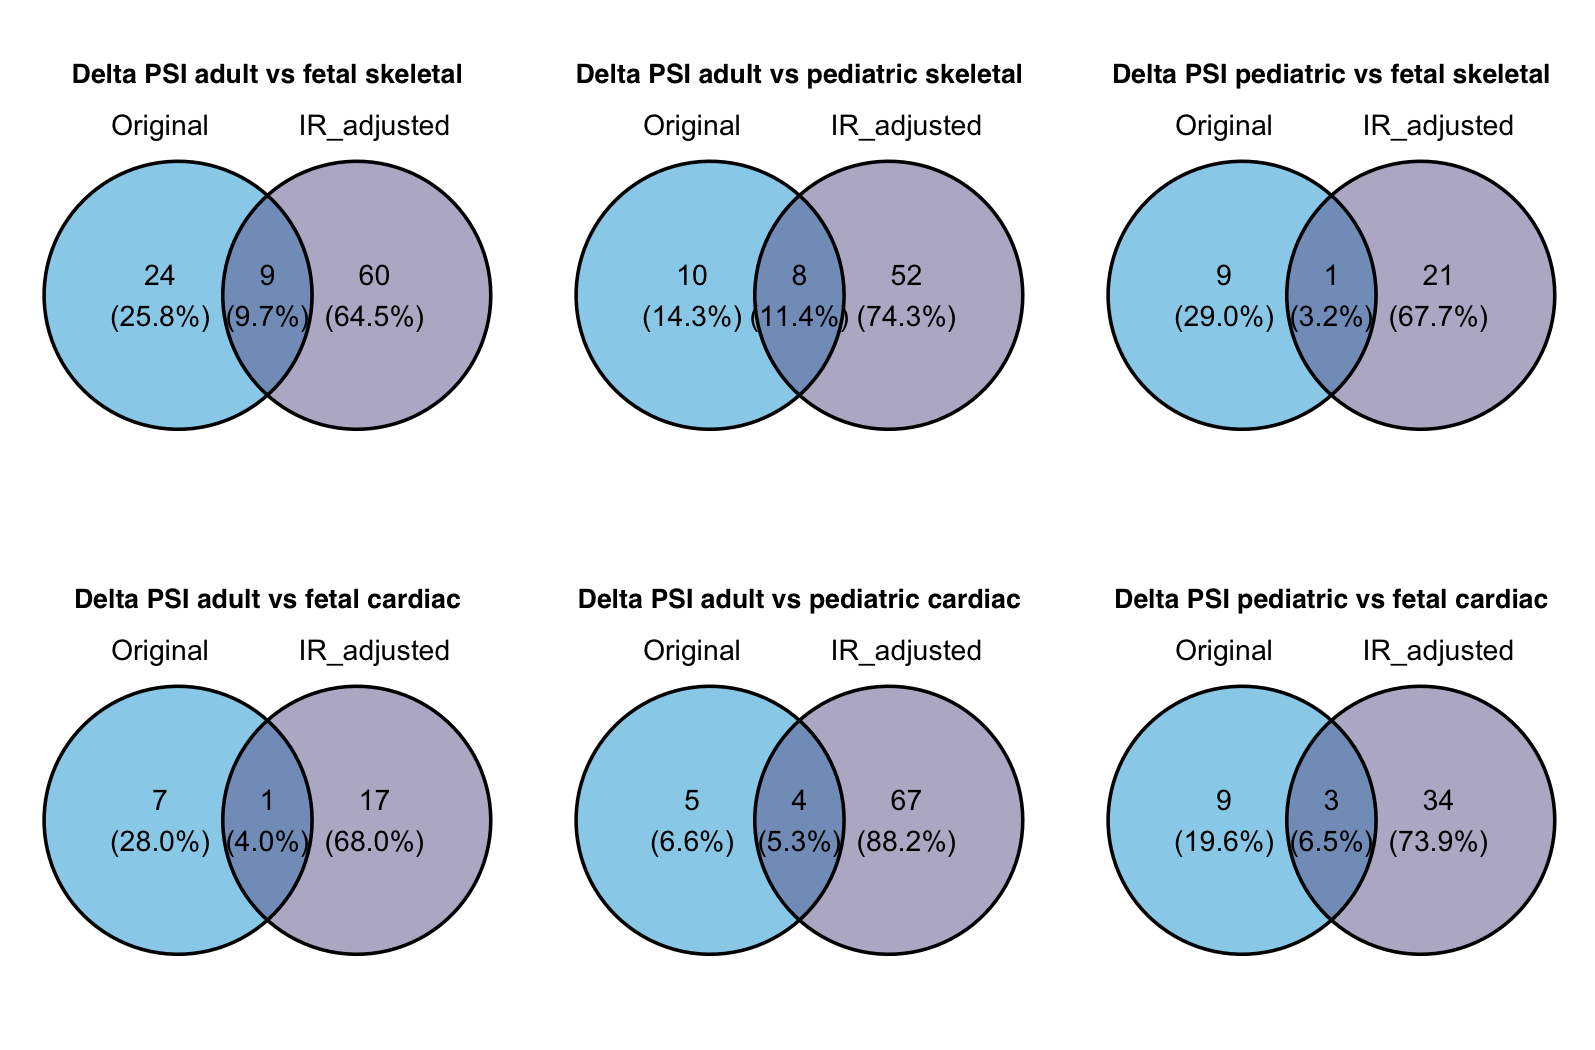

In [27]:
cutoff <- 0.1
plot_one_delta <- function(val_col, id_col="gene"){
    cbind_df <- cbind(original.stat_by_gene[, c(id_col, val_col)], adjusted.stat_by_gene[,val_col])
    valid_rows <- !is.na(cbind_df[,2]) & !is.na(cbind_df[,3])& cbind_df[,2] * cbind_df[,3] >= 0
    df1 <- original.stat_by_gene
    ori.fil_ids <- df1[df1[[val_col]] > cutoff | df1[[val_col]] < -1* cutoff, id_col]
    df2 <- adjusted.stat_by_gene
    adj.fil_ids <- df2[df2[[val_col]] > cutoff | df2[[val_col]] < -1* cutoff, id_col]
    data <- list(Original = ori.fil_ids, IR_adjusted = adj.fil_ids)
    # Compute the intersection of the filtered IDs
    fil_ids_union <- intersect(ori.fil_ids, adj.fil_ids)
    
    # Select the rows based on union of IDs
    selected_rows1 <- df1[[id_col]] %in% fil_ids_union
    selected_rows2 <- df2[[id_col]] %in% fil_ids_union
    
    # Check if the selected rows are identical (assuming you want to confirm this)
    stopifnot(all(selected_rows1 == selected_rows2))
    
    # Combine the selected rows into a new data frame
    df_to_output <- cbind(df1[selected_rows1, c(id_col, val_col)], df2[selected_rows2, val_col])
    colnames(df_to_output) <- c("gene", paste0(val_col, ".original"), paste0(val_col, ".IR_adjusted"))
    
    # Write to file
    write.table(df_to_output, file=paste0(Sys.getenv("psi_fig_tables_RData_dir"), "/delta_PSI_by_gene.", val_col, ".tsv"), row.names = FALSE, quote = FALSE, sep = "\t")
        title_lab <- gsub("_|\\.", " ", gsub("delta", "Delta PSI", val_col))
    plot <- ggvenn(data, fill_color=col_sz[1:2], text_size=6) +
              labs(title = title_lab) + 
              theme_Publication() + 
              theme(plot.title = element_text(size = 16, margin = margin(b = 10)),
                   axis.text = element_blank(),
                axis.ticks = element_blank(),
                axis.title = element_blank(),
                     axis.line = element_blank())+
              ylim(-1.1, 1.3) +
          xlab(NULL) + 
          ylab(NULL)
    return(plot)
}
p1 <- plot_one_delta("delta_adult_vs_fetal.skeletal")
p2 <- plot_one_delta("delta_adult_vs_pediatric.skeletal")
p3 <- plot_one_delta("delta_pediatric_vs_fetal.skeletal")
p4 <- plot_one_delta("delta_adult_vs_fetal.cardiac")
p5 <- plot_one_delta("delta_adult_vs_pediatric.cardiac")
p6 <- plot_one_delta("delta_pediatric_vs_fetal.cardiac")


ww <- base_width*3.8
hh <- base_width*2.5
options(repr.plot.width=ww, repr.plot.height=hh)


layout_mat <- matrix(1:6, ncol = 3, byrow=T)

ge <- gridExtra::grid.arrange(p1, p2, p3, p4, p5, p6, ncol = 3, layout_matrix = layout_mat)
ggsave("FigureS7.pdf", ge, width = ww, height = hh)

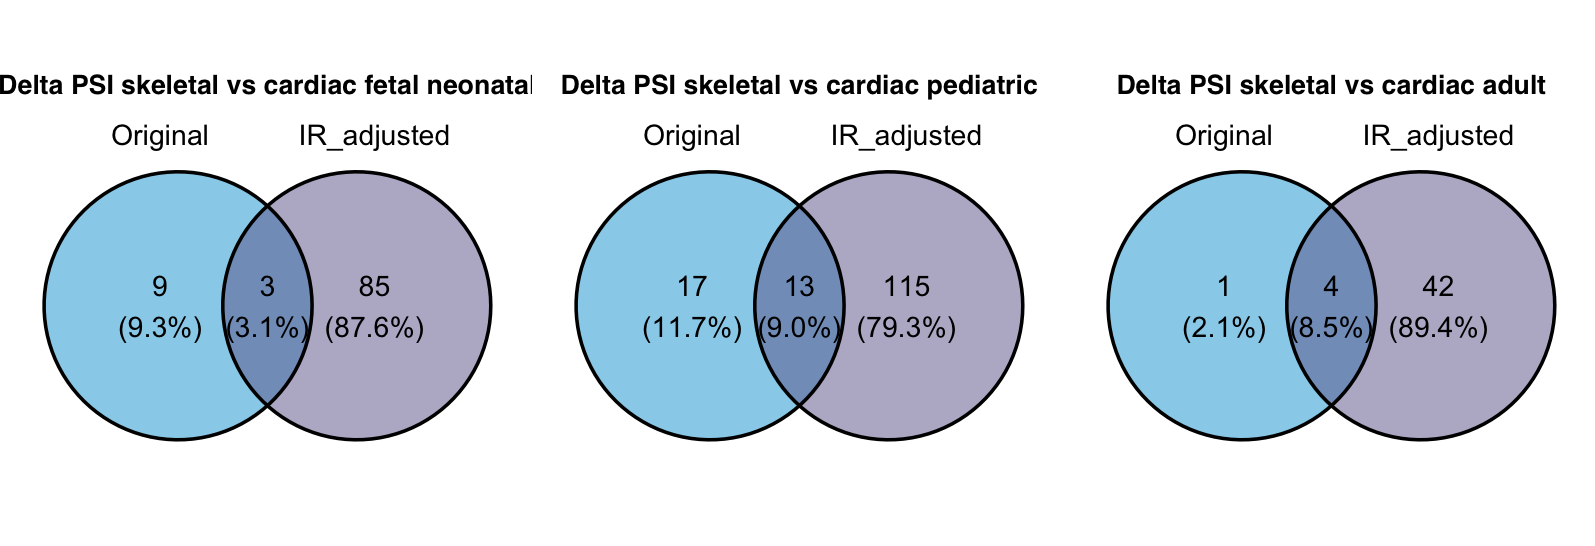

In [28]:
p1 <- plot_one_delta('delta_skeletal_vs_cardiac.fetal_neonatal')
p2 <- plot_one_delta('delta_skeletal_vs_cardiac.pediatric')
p3 <- plot_one_delta('delta_skeletal_vs_cardiac.adult')
ww <- base_width*3.8
hh <- base_width*1.3
options(repr.plot.width=ww, repr.plot.height=hh)


layout_mat <- matrix(1:3, ncol = 3, byrow=T)

ge <- gridExtra::grid.arrange(p1, p2, p3, ncol = 3, layout_matrix = layout_mat)
ggsave("FigureS8.pdf", ge, width = ww, height = hh)